<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground-009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# 必要ライブラリ・コマンドの導入
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
w = !apt install tree
print(w[-2])

tree is already the newest version (2.0.2-1).


In [139]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

torch.manual_seed(123)
def calc_result(x):
  return x**2 + torch.randn(100,1)*0.1
x = torch.randn(100, 1)
y = calc_result(x)
# print(x)
# print(y)

x_train = x[  :50, :]
x_test  = x[50:  , :]
y_train = y[  :50, :]
y_test  = y[50:  , :]


In [158]:
# レイヤー関数定義
num_layer=10

# 予測関数
l1 = torch.nn.Linear(1, num_layer) # 初段
l2 = torch.nn.Linear(num_layer, num_layer) # 中間層
l3 = torch.nn.Linear(num_layer, num_layer) # 中間層
l4 = torch.nn.Linear(num_layer, 1) # 最終段

# 活性化関数
relu = torch.nn.ReLU(inplace=True)

# 関数合成
net = torch.nn.Sequential(
    l1,
    relu,
    l2,
    relu,
    # l3,
    # relu,
    l4,
)


# ダミー入力データを作成
inputs = torch.randn(100, 1)
output = net(inputs)

# 入力テンソルと出力テンソルのshape
print(f'入力テンソル:{inputs.shape}')
print(f'出力テンソル:{output.shape}')



入力テンソル:torch.Size([100, 1])
出力テンソル:torch.Size([100, 1])


In [159]:
# 繰り返し制御
num_epochs = 1000
lr = 0.01
momentum = 0.9

# optimizerとしてSGD（確率的勾配降下法を指定する）
import torch.optim as optim
optimizer = optim.SGD([l1.weight, l1.bias], lr=lr, momentum=momentum)

# 記録用配列初期化
history = np.zeros((0, 2))

# ループ処理
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

for epoch in range(num_epochs):

  # 予測計算
  Yp = net(x_train)
  # 損失計算
  loss = mse(Yp, y_train)
  # 勾配計算
  loss.backward()
  # パラメータ修正
  optimizer.step()
  # 勾配値初期化
  optimizer.zero_grad()

  # 損失の記録
  if (epoch %10 == 0):
    item = np.array([epoch, loss.item()])
    history = np.vstack((history, item))
    # print(f'epoch = {epoch}, loss = {loss:.4f}')


('0.weight', Parameter containing:
tensor([[ 0.4312],
        [ 0.1447],
        [ 5.7778],
        [-7.4787],
        [-5.1398],
        [-0.1862],
        [ 0.3324],
        [-6.1554],
        [ 0.4295],
        [-0.0570]], requires_grad=True))
('0.bias', Parameter containing:
tensor([-0.9422, -0.3223,  3.5269,  3.6353,  2.2815, -0.7370, -0.6397,  1.9539,
        -0.8809, -0.2036], requires_grad=True))
('2.weight', Parameter containing:
tensor([[ 0.0175,  0.1285, -0.0979,  0.1998, -0.0080, -0.0818, -0.0882,  0.2176,
          0.0191, -0.1779],
        [-0.1829, -0.0011,  0.0738, -0.1944, -0.2865,  0.1301,  0.0956, -0.1769,
         -0.1719,  0.2457],
        [-0.2075,  0.2222, -0.2001,  0.1203, -0.0162,  0.1191,  0.1411, -0.1381,
         -0.2798, -0.0051],
        [ 0.0539, -0.0355,  0.1150,  0.3129, -0.1294,  0.1044,  0.0994,  0.1808,
         -0.1347, -0.3063],
        [-0.1847,  0.0215, -0.3137,  0.2665,  0.2546,  0.0742, -0.2286, -0.3008,
          0.1875, -0.2088],
        [ 0.

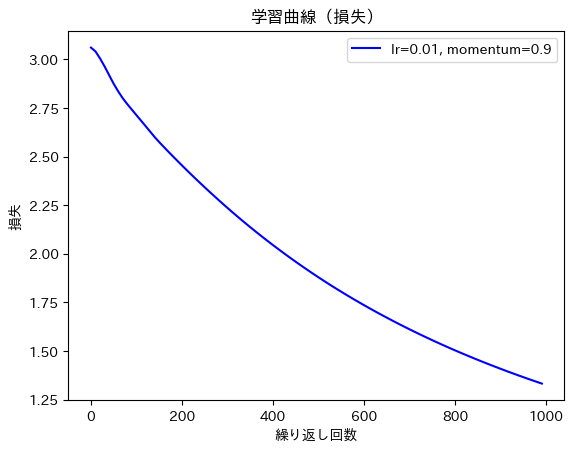

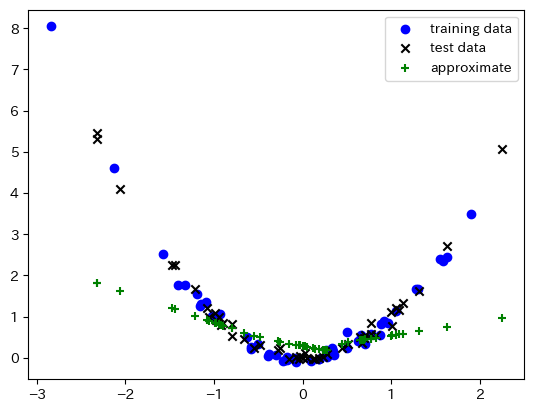

In [160]:
# 学習曲線の表示（損失）
for param in net.named_parameters():
  print(param)
plt.plot(history[:, 0], history[:, 1], 'b', label=f'lr={lr}, momentum={momentum}')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.legend()
plt.title('学習曲線（損失）')
plt.show()

# 訓練データ、検証データ、予測データの表示
plt.scatter(x_train.data, y_train.data, c='b', label='training data')
plt.scatter(x_test.data,  y_test.data,  c='k', label='test data', marker='x')
plt.scatter(x_test.data, net(x_test).data, c='g', label='approximate', marker='+')

plt.legend()
plt.show()
